In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

In [12]:
data = pd.read_csv('../clean_data.csv', index_col=0)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,3,2,4,...,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,2,2,4,...,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,3,2,4,...,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,2,2,3,...,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,3,2,4,...,0,0,0,0,1,0,0,0,1,0


In [13]:
data.shape

(1459, 533)

In [14]:
y = data['SalePrice']
x = data.drop(labels = 'SalePrice', axis=1).astype("float64")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [15]:
RF = RandomForestRegressor(n_estimators=1000, max_features=30, random_state=42)
cv_score2 = cross_val_score(RF, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('Cross validation scores for GBR model:', np.sqrt(-cv_score2).mean())

Cross validation scores for GBR model: 33549.06013819239


In [16]:
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)

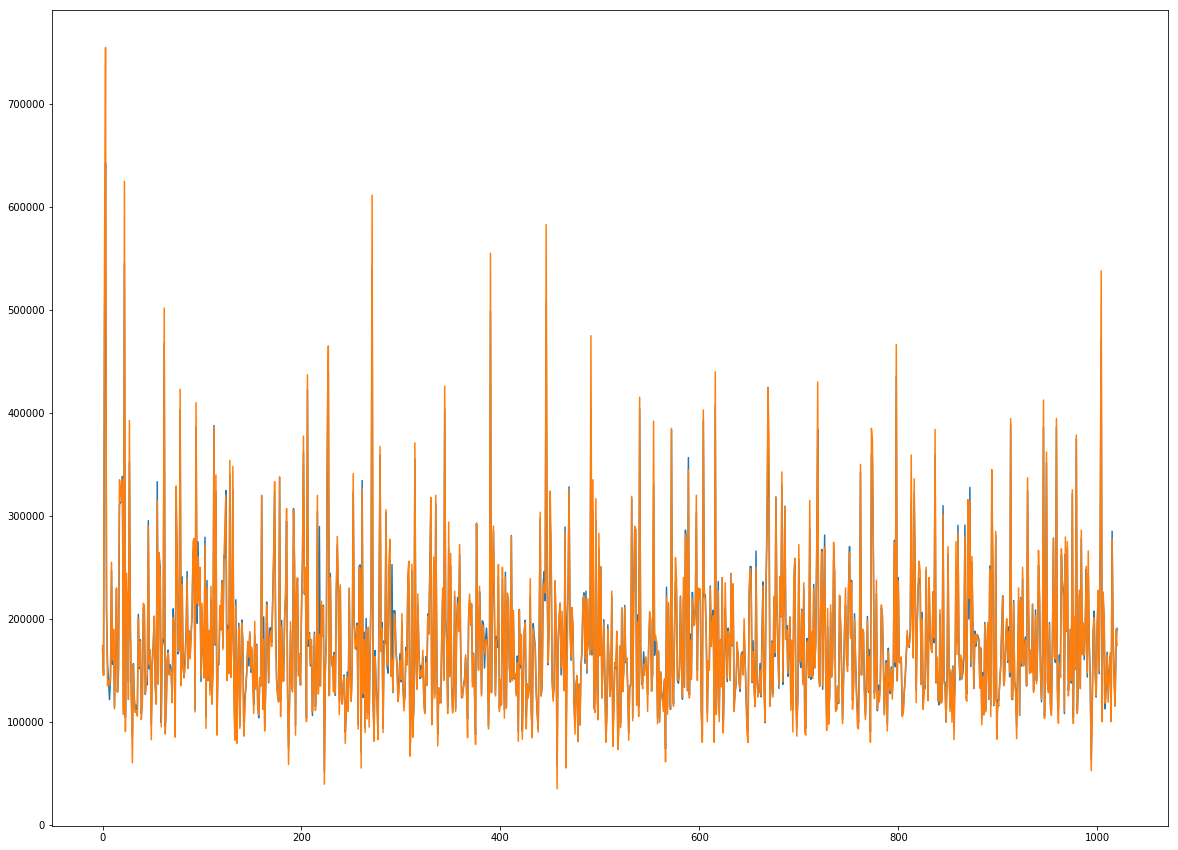

In [17]:
plt.subplots(figsize=(20,15))
plt.plot(y_pred_train)
plt.plot(y_train.values)

In [19]:
GBR = GradientBoostingRegressor(learning_rate= 0.1, n_estimators=1500, max_depth=2)
cv_score = cross_val_score(GBR, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('Cross validation scores for GBR model:', np.sqrt(-cv_score).mean())

Cross validation scores for GBR model: 33382.1591794812


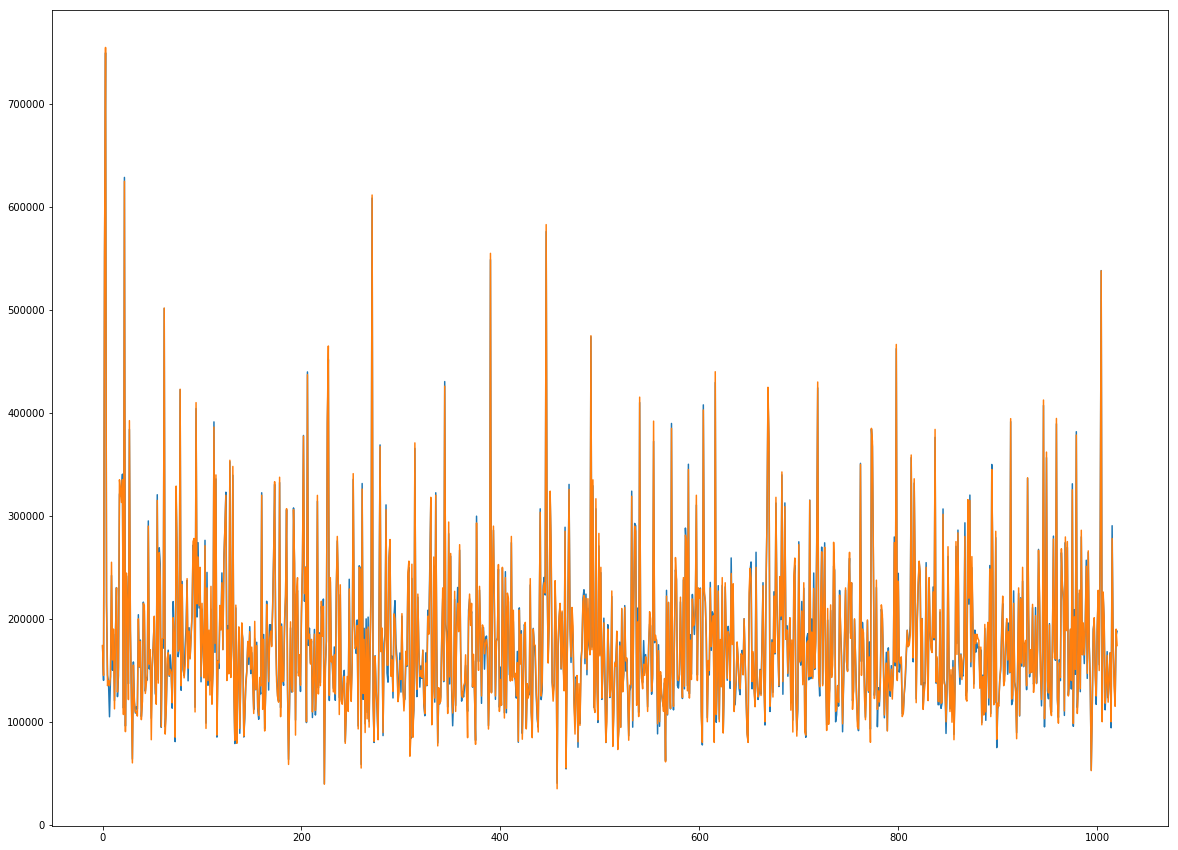

In [22]:
GBR.fit(x_train, y_train)
y_pred_train = GBR.predict(x_train)
plt.subplots(figsize=(20,15))
plt.plot(y_pred_train)
plt.plot(y_train.values)